# Initial Setup

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

temperature_df = pd.read_excel('dataset/Temp_SRS_1Jan1964_to_31Oct2020.xlsx')
rainfall_df = pd.read_csv('dataset/Rainfall_at_SRS_30Nov1960_to_18Nov2020.csv')

rainfall_df = rainfall_df.fillna(0)

# Temperature Trend
Conclusion: The average minimum temperature is increasing throughout the years.

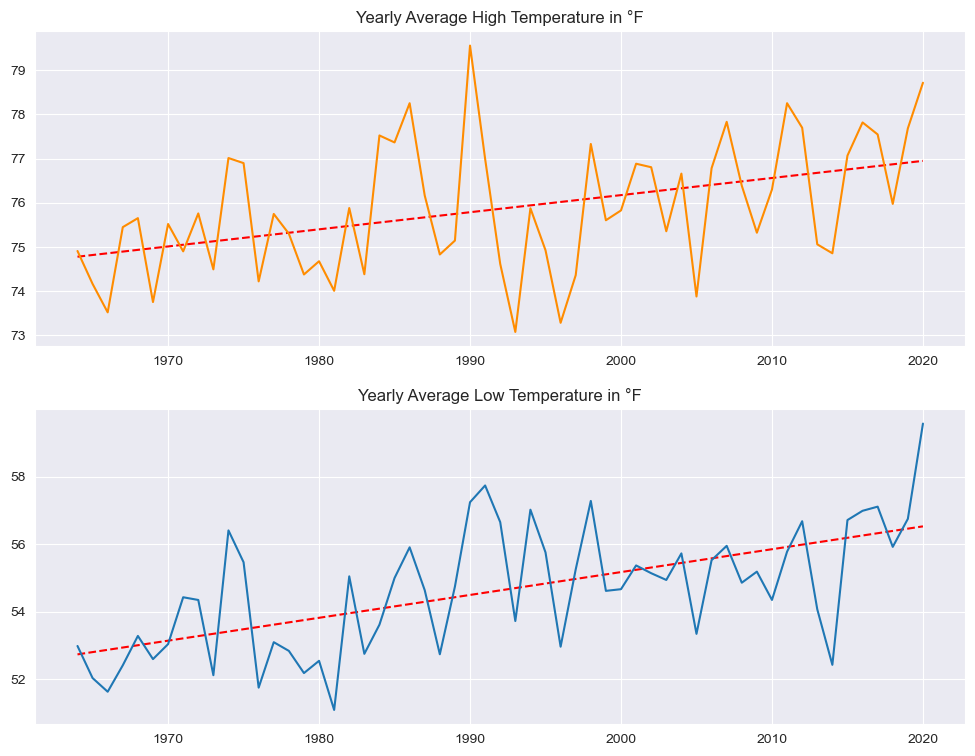

In [43]:
temperature_df['YEAR'] = pd.to_datetime(temperature_df.DATE).dt.year

temperature_df_grouped = temperature_df.groupby('YEAR').agg({'LOW TEMP': 'mean', 'HIGH TEMP': 'mean'})
temperature_df_grouped.rename(columns={'LOW TEMP': 'AVG_LOW_TEMP', 'HIGH TEMP': 'AVG_HIGH_TEMP'}, inplace=True)
temperature_df_grouped.reset_index(inplace=True)

fig, ax = plt.subplots(2, 1, figsize=(12, 9))

z = np.polyfit(temperature_df_grouped['YEAR'], temperature_df_grouped['AVG_HIGH_TEMP'], 1)
p = np.poly1d(z)
ax[0].plot(temperature_df_grouped['YEAR'], p(temperature_df_grouped['YEAR']), "r--")
ax[0].plot(temperature_df_grouped['YEAR'], temperature_df_grouped['AVG_HIGH_TEMP'], 'darkorange')
ax[0].set_title('Yearly Average High Temperature in °F')

z = np.polyfit(temperature_df_grouped['YEAR'], temperature_df_grouped['AVG_LOW_TEMP'], 1)
p = np.poly1d(z)
ax[1].plot(temperature_df_grouped['YEAR'], p(temperature_df_grouped['YEAR']), "r--")
ax[1].plot(temperature_df_grouped['YEAR'], temperature_df_grouped['AVG_LOW_TEMP'])
ax[1].set_title('Yearly Average Low Temperature in °F')

plt.show()


# Rainfall Trend
Conclusion:

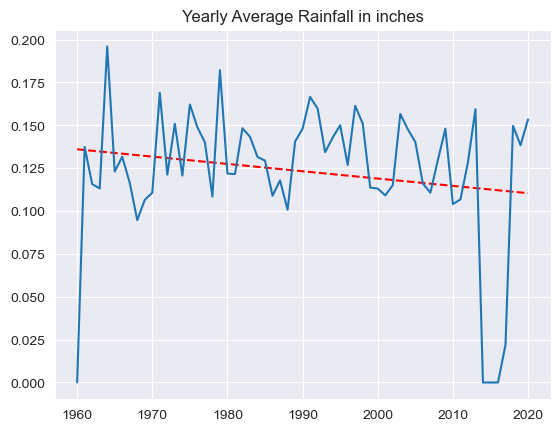

In [45]:
rainfall_df['YEAR'] = pd.to_datetime(rainfall_df.DATE).dt.year

rainfall_df_grouped = rainfall_df.groupby('YEAR').agg({'200-F Rainfall (inches/day)': 'mean'})
rainfall_df_grouped.rename(columns={'200-F Rainfall (inches/day)': 'AVG_RAINFALL'}, inplace=True)
rainfall_df_grouped.reset_index(inplace=True)

z = np.polyfit(rainfall_df_grouped['YEAR'], rainfall_df_grouped['AVG_RAINFALL'], 1)
p = np.poly1d(z)
plt.plot(rainfall_df_grouped['YEAR'], p(rainfall_df_grouped['YEAR']), "r--")
plt.plot(rainfall_df_grouped['YEAR'], rainfall_df_grouped['AVG_RAINFALL'])
plt.title('Yearly Average Rainfall in inches')

plt.show()